# Diseño de Algoritmos

## Curso 2024-2025

### Práctica 1

* Realizado por:  Marcos López Gómez 
    - Marcos.lopez14@alu.uclm.es

## 0.1 Importaciones necesarias

Para la realización de esta práctica es necesario utilizar las siguientes librerias.

In [1]:
import matplotlib.pyplot as plt
import random
from time import time
import numpy as np
import numpy.polynomial as P

## 0.2 Algoritmos directos a probar

Los siguientes son los algoritmos sobre los cuales vamos a realizar las pruebas de la primera parte de la práctica. Son el algoritmo de ordenación de Selección, Inserción y Burbuja.

In [2]:
def Burbuja(a,n):
    for i in range(1,n):
        for j in range(0,n-i):
            if(a[j] > a[j+1]):
                k = a[j+1]
                a[j+1] = a[j]
                a[j] = k

def Insercion(a,n):
    for i in range(1,n):
        v=a[i]
        j=i-1
        while j >= 0 and a[j] > v:
            a[j+1] = a[j]
            j=j-1
        a[j+1]=v

def Seleccion(a,n):
    for i in range(0,n-1):
        min=i
        for j in range(i+1,n):
            if a[min] > a[j]:
                min=j
        aux=a[min]
        a[min]=a[i]
        a[i]=aux

# 1. Pruebas a algoritmos de ordenación directos

Para cada uno de los tres algoritmos de ordenación vamos a realizar tres pruebas diferentes, una con vectores en ordenación directa, otra con vectores con ordenación inversa y otra con vectores con ordenación aleatoria. Para cada una de estas pruebas vamos a utilizar vectores desde 100 elementos hasta 2000 elementos con saltos de 100 en 100.

## 1.1 Creación de Vectores

Es necesario definir funciones que generen los vectores con los que probaremos los algoritmos. Al necesitar tres tipos de vectores, también necesitaremos tres. funciones

In [3]:
def VectorDirecto(n):
    return list(range(n))

def VectorInverso(n):
    return list(range(n, 0, -1))  

def VectorAleatorio(n):
    return random.sample(range(n), n)  


Cada una de las funciones anteriores genera un tipo de vector que usaremos en las pruebas; concretamente, VectorDirecto, genera los vectores con orden directo, VectorInverso genera los vectores con orden inverso y VectorAleatorio genera los vectores con orden aleatorio. Notese que ningún vector, incluido los aleatorios, puede contener elementos repetidos.

## 1.2 Código de pruebas para algoritmos directos

In [4]:
def PruebaDirecta():
    TInsercionD =[]
    TSeleccionD =[]
    TBurbujaD =[]

    TInsercionI =[]
    TSeleccionI =[]
    TBurbujaI =[]

    TInsercionA =[]
    TSeleccionA =[]
    TBurbujaA =[]

    tam=[]

    for i in range(100,2001,100):
        v=VectorDirecto(i)

        t1=time()
        Burbuja(v[:],i)
        t2=time()-t1
        TBurbujaD.append(round((1000*t2),4))
     
        t1=time()
        Insercion(v[:],i)
        t2=time()-t1
        TInsercionD.append(round((1000*t2),4))

        t1=time()
        Seleccion(v[:],i)
        t2=time()-t1
        TSeleccionD.append(round((1000*t2),4))

        tam.append(i)

    for i in range(100,2001,100):
        v=VectorInverso(i)

        t1=time()
        Burbuja(v[:],i)
        t2=time()-t1
        TBurbujaI.append(round((1000*t2),4))
     
        t1=time()
        Insercion(v[:],i)
        t2=time()-t1
        TInsercionI.append(round((1000*t2),4))

        t1=time()
        Seleccion(v[:],i)
        t2=time()-t1
        TSeleccionI.append(round((1000*t2),4))

    for i in range (100,2001,100):
        ttb=0
        tti=0
        tts=0
        for j in range (0,10):
            v=VectorAleatorio(i)

            t1=time()
            Burbuja(v[:],i)
            t2=time()-t1
            ttb=ttb+((1000*t2))
     
            t1=time()
            Insercion(v[:],i)
            t2=time()-t1
            tti=tti+((1000*t2))

            t1=time()
            Seleccion(v[:],i)
            t2=time()-t1
            tts=tts+((1000*t2))
    
        ttb=round((ttb/10),4)
        tti=round((tti/10),4)
        tts=round((tts/10),4)

        TBurbujaA.append(ttb)
        TSeleccionA.append(tts)
        TInsercionA.append(tti)

    return TBurbujaA,TBurbujaD,TBurbujaI,TInsercionA,TInsercionD,TInsercionI,TSeleccionA,TSeleccionD,TSeleccionI,tam

Tras la ejecución de este código, la información de los tiempos de ejecución de los algoritmos queda almacenada en las listas: TBurbujaD, TSeleccionD, TInsercionD; que contiene los tiempos de cada algoritmo con vectores con ordenación directa; TBurbujaI, TSeleccionI, TInsercionI; que contiene los tiempos de cada algoritmo con vectores con ordenación inversa y TBurbujaA, TSeleccionA, TInsercionA; que contiene los tiempos de cada algoritmo con vectores con ordenación aleatoria.

## 1.3 Creación de salidas

En este parte esta el código para la creación de las tablas, gráficas y el ajuste de la funición.

In [7]:
def TablaSalidaDirecta(nombre,directo, inverso, aleatorio):
    fila1=[]
    fila1.append("tam")
    for i in range(100, 2001,100):
        fila1.append(i)

    fila2=[]
    fila2.append("Directo")
    fila2=fila2+directo

    fila3=[]
    fila3.append("Inverso")
    fila3=fila3+inverso
    
    fila4=[]
    fila4.append("Aleatorio")
    fila4=fila4+aleatorio

    tabla=[fila1,fila2,fila3,fila4]
    print(nombre)
    for fila in tabla:
        print(" ".join(f"{str(elem):<10}" for elem in fila))
    print("")


def GraficaSalidaDirecta(nombre,insercion,seleccion,burbuja,tam):
    plt.clf() 
    plt.plot(tam,insercion,"r-",tam,seleccion,'b-',tam,burbuja,'g-')
    plt.title(nombre)
    plt.ylabel("tiempo (s)")
    plt.xlabel("nº elementos")
    plt.legend
    plt.show()

def AjusteSalida(nombre,insercion,seleccion,burbuja,tam):
    x=np.polyfit(tam,insercion,2)
    y=np.polyfit(tam,seleccion,2)
    z=np.polyfit(tam,burbuja,2)
    print("Ajustes con vectores con ",nombre,"\nInsercción : ",x,"\nSeleccion : ",y,"\nBurbuja : ",z,"\n")

En este código, describe las funciones para la presentación de resultados de las pruebas de los algoritmos. La primera función genera una tabla, la cual contiene la información del tiempo de ejecución de un algoritmo con los diferentes tipos de vectores, y en función del tamaño de estos. La segunda función genera una gráfica que compara los tiempos de ejecución de los 3 diferentes algoritmos con un mismo tipo de vector para los 3, teniendo el tamaño del vector en el eje de la x, y el tiempo de ejecución en el de la y. Finalmente la tercera función devuelve el ajuste de las 3 funciones para un tipo de vector.

## 1.4 Realización de las pruebas

En este código se realizan las pruebas, y se presentan los resultados, utilizando las funciones descritas previamente

Insercion
tam        100        200        300        400        500        600        700        800        900        1000       1100       1200       1300       1400       1500       1600       1700       1800       1900       2000      
Directo    0.0064     0.0095     0.0169     0.0269     0.0322     0.0446     0.0539     0.0565     0.0622     0.0708     0.0813     0.0856     0.0937     0.102      0.1125     0.1171     0.1249     0.1354     0.1428     0.1709    
Inverso    0.1767     0.8702     1.622      3.0251     4.9186     7.5562     10.7739    16.659     19.5887    23.757     27.7619    33.7341    40.0441    47.9553    54.6601    63.715     71.5666    79.7276    89.1056    99.4358   
Aleatorio  0.0857     0.3511     0.7756     1.5261     2.6526     4.0129     5.8623     7.7979     10.1479    12.671     15.4796    18.6423    22.3673    25.6238    29.6789    33.9662    38.3758    42.8383    48.6084    53.6275   

Seleccion
tam        100        200        300        400        

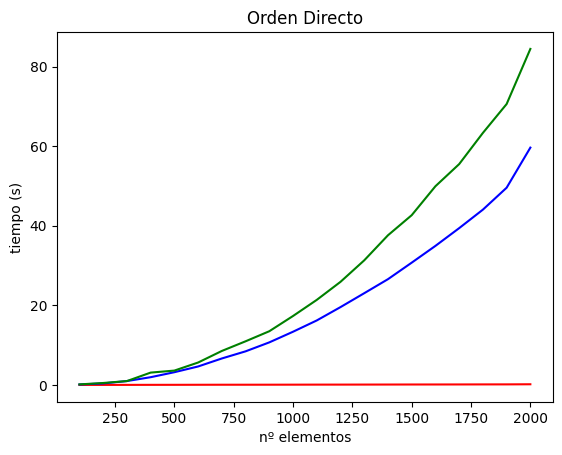

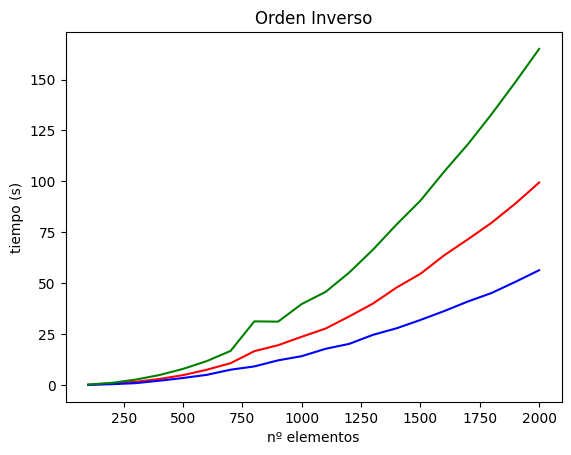

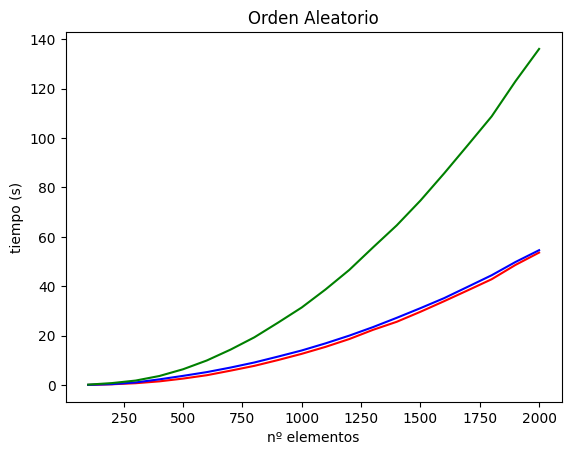

Ajustes con vectores con  Orden Directo 
Insercción :  [8.51161996e-09 6.17609364e-05 2.41842105e-04] 
Seleccion :  [ 1.55236284e-05 -3.07963014e-03  6.67534912e-01] 
Burbuja :  [ 2.39328611e-05 -8.15637303e-03  1.57040096e+00] 

Ajustes con vectores con  Orden Inverso 
Insercción :  [ 2.61858892e-05 -2.78826121e-03  1.83598333e-01] 
Seleccion :  [ 1.33519287e-05  1.62035578e-03 -4.70921228e-01] 
Burbuja :  [ 4.37139935e-05 -5.09814651e-03  3.66818158e-01] 

Ajustes con vectores con  Orden Aleatorio 
Insercción :  [ 1.41736466e-05 -1.47467444e-03 -3.62147368e-02] 
Seleccion :  [ 1.31573172e-05  1.18161442e-03 -2.48125263e-01] 
Burbuja :  [ 3.66539468e-05 -5.30275670e-03  1.79275877e-01] 



In [8]:
ba,bd,bi,ia,id,ii,sa,sd,si,tam=PruebaDirecta()

TablaSalidaDirecta("Insercion",id,ii,ia)
TablaSalidaDirecta("Seleccion",sd,si,sa)
TablaSalidaDirecta("Burbuja",bd,bi,ba)

GraficaSalidaDirecta("Orden Directo",id,sd,bd,tam)
GraficaSalidaDirecta("Orden Inverso",ii,si,bi,tam)
GraficaSalidaDirecta("Orden Aleatorio",ia,sa,ba,tam)

AjusteSalida("Orden Directo",id,sd,bd,tam)
AjusteSalida("Orden Inverso",ii,si,bi,tam)
AjusteSalida("Orden Aleatorio",ia,sa,ba,tam)

En las pruebas mostradas, donde en las gráficas la linea roja representa el algoritmo de insercion, la azul el de selección y el verde el de burbuja, podemos ver, que el algoritmo menos eficiente para todos los casos es el de burbuja, mientras que el de insercion es el mejor con una gran diferencia para vectores con orden directo, pero para vectores con orden inverso es mejor el de selección, y para vectores aleatorios estos dos obtienen resultados muy similares.

# 2. Pruebas a algoritmos de ordenación de Divide y vencerás

Esta parte de la práctica es muy similar a la anterior, pero utilizando dos algoritmos de ordenación de la metodología Divide y vencerás. concretamente el quicksort y el mergesort. Las pruebas las realizaré tambien con vectores en orden directo, inverso y aleatorio, solo que en este caso el tamaño de los vectores empezará en 250, y llegará a 5000, con pasos de 250.

## 2.1 Algoritmos Divide y vencerás a probar

En este código se muestrán los algoritmos quicksort y mergesort que vamos a poner a prueba

In [9]:
def QuickSortMediana(a,iz,de):
    i=iz
    j=de
    x=a[int((iz + de)/2)]
 
    while( i <= j ):
        while a[i]<x and j<=de:
            i=i+1
        while x<a[j] and j>iz:
            j=j-1
        if i<=j:
            aux = a[i]; a[i] = a[j]; a[j] = aux
            i=i+1;  j=j-1
 
    if iz < j:
        QuickSortMediana( a, iz, j )
    if i < de:
        QuickSortMediana( a, i, de )


def QuickSortIzquierda(a,iz,de):
    i=iz
    j=de
    x=a[iz]
 
    while( i <= j ):
        while a[i]<x and j<=de:
            i=i+1
        while x<a[j] and j>iz:
            j=j-1
        if i<=j:
            aux = a[i]; a[i] = a[j]; a[j] = aux
            i=i+1;  j=j-1
 
    if iz < j:
        QuickSortIzquierda( a, iz, j )
    if i < de:
        QuickSortIzquierda( a, i, de )



def MergeSort(a,n):
    if n>1:
        m = n//2
        l = a[:m]
        r = a[m:]

        MergeSort(l,len(l))
        MergeSort(r,len(r))

        i=0; j=0; k=0
        while i < len(l) and j < len(r):
            if l[i] < r[j]:
                a[k]=l[i]
                i=i+1
            else:
                a[k]=r[j]
                j=j+1
            k=k+1

        while i < len(l):
            a[k]=l[i]
            i=i+1
            k=k+1

        while j < len(r):
            a[k]=r[j]
            j=j+1
            k=k+1


## 2.2 Código de pruebas para algoritmos Divide y vencerás

En esta parte se especifíca el código para la realización de las pruebas con los algoritmos de la metodología Divide y vencerás.

In [32]:
def PruebaDivide():

    TQuickMedianaD =[]
    TMergeD =[]

    TQuickMedianaI =[]
    TMergeI =[]

    TQuickIzquierdaA =[]
    TQuickMedianaA =[]
    TMergeA =[]

    tam=[]

    for i in range(250,5001,250):
        v=VectorDirecto(i)

        t1=time()
        QuickSortMediana(v[:],0,(len(v)-1))
        t2=time()-t1
        TQuickMedianaD.append(round((1000*t2),4))

        t1=time()
        MergeSort(v[:],i)
        t2=time()-t1
        TMergeD.append(round((1000*t2),4))

        tam.append(i)

    for i in range(250,5001,250):
        v=VectorInverso(i)
        
        t1=time()
        QuickSortMediana(v[:],0,(len(v)-1))
        t2=time()-t1
        TQuickMedianaI.append(round((1000*t2),4))
        
        t1=time()
        MergeSort(v[:],i)
        t2=time()-t1
        TMergeI.append(round((1000*t2),4))

    for i in range (250,5001,250):
        tqi=0
        tqm=0
        tm=0
        for j in range (0,10):
            v=VectorAleatorio(i)

            t1=time()
            QuickSortIzquierda(v[:],0,(len(v)-1))
            t2=time()-t1
            tqi=tqi+(1000*t2)
     
            t1=time()
            QuickSortMediana(v[:],0,(len(v)-1))
            t2=time()-t1
            tqm=tqm+(1000*t2)

            t1=time()
            MergeSort(v[:],i)
            t2=time()-t1
            tm=tm+(1000*t2)
    
        tqi=round((tqi/10),4)
        tqm=round((tqm/10),4)
        tm=round((tm/10),4)

        TQuickIzquierdaA.append(tqi)
        TQuickMedianaA.append(tqm)
        TMergeA.append(tm)

    return TQuickIzquierdaA,TQuickMedianaD,TQuickMedianaI,TQuickMedianaA,TMergeD,TMergeI,TMergeA,tam

El código con el que probaré estos algoritmos es muy similar a el de los anteriores, y también devuelve una lista con tiempos por cada algoritmo y tipo de vector.

## 2.3 Creación de salidas para algoritmos Divide y vencerás

En este codigo están especificadas las funciones para imprimir los resultados de las pruebas con los algortmos de la metodología Divide y vencerás, que es muy similar al de los otros algoritmos solo que sin el ajuste de las funciones, ya que para estos algoritmos no se podía hacer de la misma manera que para los anteriores.

In [44]:
def TablaSalidaDivide(nombre,directo, inverso, aleatorio):
    fila1=[]
    fila1.append("tam")
    for i in range(250, 5001,250):
        fila1.append(i)

    fila2=[]
    if len(directo)>0:
        fila2.append("Directo")
        fila2=fila2+directo

    fila3=[]
    if len(inverso) >0:
        fila3.append("Inverso")
        fila3=fila3+inverso
    
    fila4=[]
    if len(aleatorio)>0:
        fila4.append("Aleatorio")
        fila4=fila4+aleatorio

    tabla=[fila1,fila2,fila3,fila4]
    print(nombre)
    for fila in tabla:
        print(" ".join(f"{str(elem):<14}" for elem in fila))
    print("\n\n")


def GraficaSalidaDivide(nombre,quickMediana,merge,tam,quickIzquierda=[]):
    if len(quickIzquierda)==0:
        plt.plot(tam,quickMediana,'b-',tam,merge,'r-')
    else:
        plt.plot(tam,quickMediana,'b-',tam,merge,'r-',tam,quickIzquierda,'g-')
    plt.title(nombre)
    plt.ylabel("tiempo (s)")
    plt.xlabel("nº elementos")
    plt.legend
    plt.show()


El código anterior contiene las funciones para la realización de las tablas y gráficas de la salida de las purebas. Como se puede apreciar en las tablas aparecen los tiempos de ejecución para cada tipo de vector en función del tamaño de estos, para cada uno de los algoritmos. En las gráficas aparecen los tiempos de ejecución de los tres algoritmos para un mismo tipo de vector, estando en el eje x el tamaño del vector, y en de la y el tiempo de ejecución.

## 2.4 Realización de las pruebas

En este código se realizan las pruebas, utilizando las funciones especificadas previamnete.

QuickIzquierda
tam            250            500            750            1000           1250           1500           1750           2000           2250           2500           2750           3000           3250           3500           3750           4000           4250           4500           4750           5000          


Aleatorio      0.107          0.2929         0.4783         0.6761         0.8594         1.0629         1.2296         1.4184         1.6375         1.8401         2.0493         2.3075         2.4682         2.6848         2.9961         3.1073         3.3669         3.6172         3.8096         4.0283        



QuickMediana
tam            250            500            750            1000           1250           1500           1750           2000           2250           2500           2750           3000           3250           3500           3750           4000           4250           4500           4750           5000          
Directo        0.073  

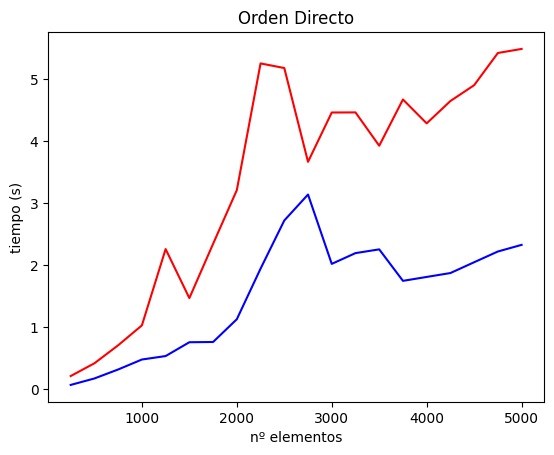

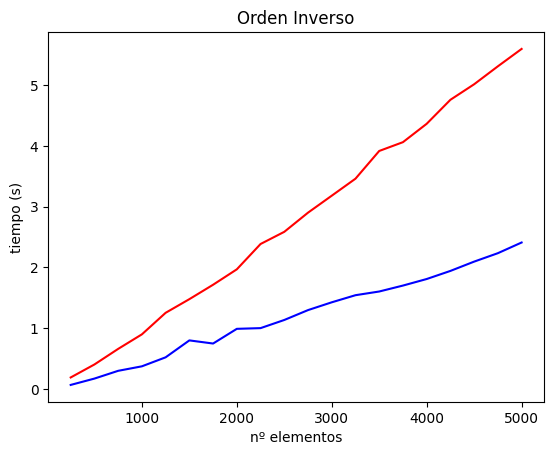

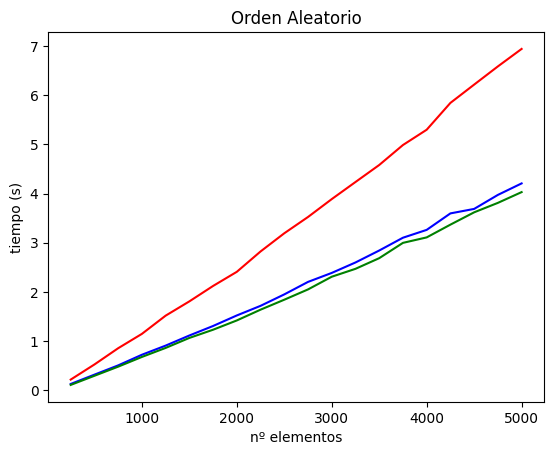

In [46]:
qia,qmd,qmi,qma,md,mi,ma,tam=PruebaDivide()

TablaSalidaDivide("QuickIzquierda",[],[],qia)
TablaSalidaDivide("QuickMediana",qmd,qmi,qma)
TablaSalidaDivide("Merge",md,mi,ma)


GraficaSalidaDivide("Orden Directo",qmd,md,tam)
GraficaSalidaDivide("Orden Inverso",qmi,mi,tam)
GraficaSalidaDivide("Orden Aleatorio",qma,ma,tam,qia)

Aquí se puede ver el resultado de las pruebas de los algoritmos quicksort con el pibote en la mediana y en la izquierda, y mergesort. Mi intención era realizar todas las pruebas también con quicksort con el pibote en la izquierda, pero me daba error de recursión, al superar la profundidad máxima de recursiones, esto ocurria siempre con el vector en orden directo e inverso (incluso me ha llegado a ocurrir alguna vez con vectores aleatorios), por eso no e realizado pruebas con el con los vectores directos e inversos, pero precisamente esto nos dice lo ineficiente que es en esos casos. Para las pruebas con vectores directos e inversos, se puede apreciar que quicksort con el pibote en la mediana (linea azul en las gráficas) es más eficiente que mergesort (línea roja en las gráficas) y en las pruebas con vectores aleatorios, se puede apreciar que tanto el quicksort con el pibote en la izquierda (linea verde en la gráfica), como con el pibote en la mediana obtienen resultados muy similares, y mejores que el mergesort.

## 2.5 Addenda

En esta parte voy a buscar cual es el vector de 10 elementos que sea el peor caso para quicksort cuando el pibote esta en la mediana.

In [43]:
vd=[0,1,2,3,4,5,6,7,8,9]
vi=[9,8,7,6,5,4,3,2,1,0]

t1=time()
QuickSortMediana(vd[:],0,(len(vd)-1))
t2=time()-t1
t2d=round((1000*t2),4)

t1=time()
QuickSortMediana(vi[:],0,(len(vi)-1))
t2=time()-t1
t2i=round((1000*t2),4)

tmin=0
vpeor=[]
for i in range(0,1):
    va=VectorAleatorio(10)
    vtemp=va[:]
    t1=time()
    QuickSortMediana(va[:],0,(len(vi)-1))
    t2=time()-t1
    t2a=round((1000*t2),4)
    if t2a > tmin:
        tmin=t2a
        vpeor=vtemp



print("Tiempo orden directo = ",t2d)
print("Tiempo orden inverso = ",t2i)
print("Peor tiempo con orden aleatorio = ",tmin)
print(vpeor)

Tiempo orden directo =  0.0494
Tiempo orden inverso =  0.0389
Peor tiempo con orden aleatorio =  0.005
[6, 8, 4, 7, 0, 9, 1, 5, 3, 2]


Como se puede apreciar, el peor caso en prácticamente todas las ejecuciones es el obtenido con el vector en orden directo (las variaciones pueden producirse por otros motivos), por lo que podemos asumir que el peor caso posible con un vector de 10 elementos es [0,1,2,3,4,5,6,7,8,9]